In [2]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

READING THE CSV DATA

In [5]:
df = pd.read_csv('data/Gold_price.csv')

In [6]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [7]:
df.shape


(193573, 11)

In [8]:
df.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

No null values

Check Duplicate

In [9]:
df.duplicated().sum()#So there are nob duplicate values

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [11]:
df.nunique()

id         193573
carat         248
cut             5
color           7
clarity         8
depth         153
table         108
x             522
y             521
z             349
price        8738
dtype: int64

In [12]:
df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [13]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [14]:
print("categories in cut  variable:    ",end="")
print(df['cut'].unique())

print("categories in color  variable:    ",end="")
print(df['color'].unique())

print("categories in clarity  variable:    ",end="")
print(df['clarity'].unique())

categories in cut  variable:    ['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
categories in color  variable:    ['F' 'J' 'G' 'E' 'D' 'H' 'I']
categories in clarity  variable:    ['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']


In [15]:
#create numerical and categorical features
numerical_column=[feature for feature in df.columns if df[feature].dtype!='O']#All the numerical column would come here
categorical_column=[feature for feature in df.columns if df[feature].dtype=='O']#All the categorical columnn would come here

print('We have {} numerical features : {}'.format(len(numerical_column), numerical_column))
print('\nWe have {} categorical features : {}'.format(len(categorical_column), categorical_column))


We have 8 numerical features : ['id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price']

We have 3 categorical features : ['cut', 'color', 'clarity']


In [16]:

df.head(2)


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387


<Axes: >

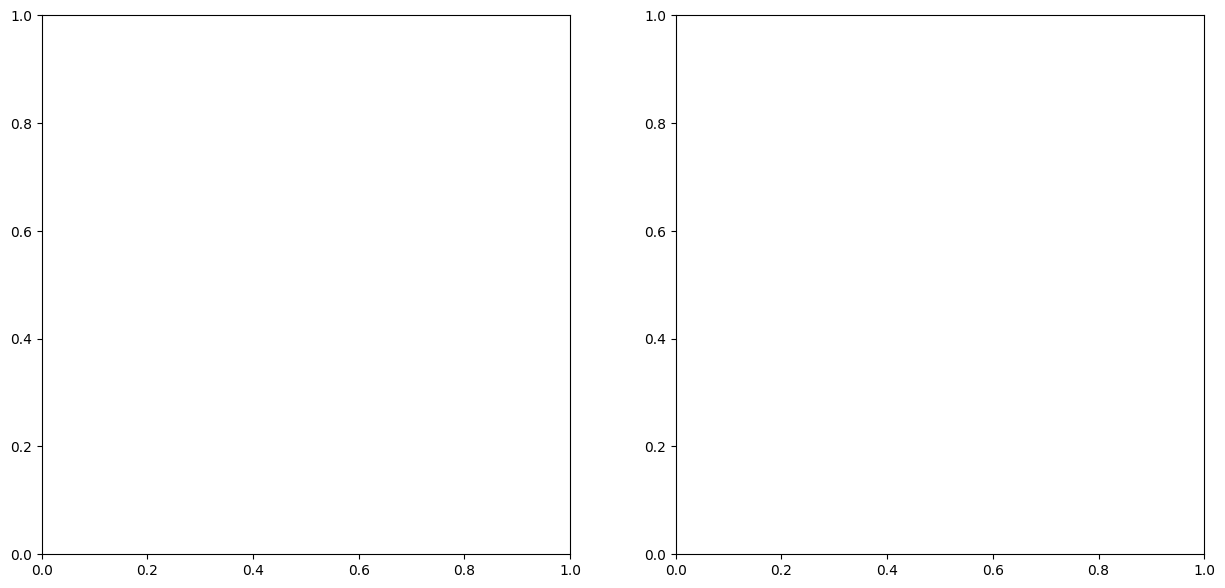

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)


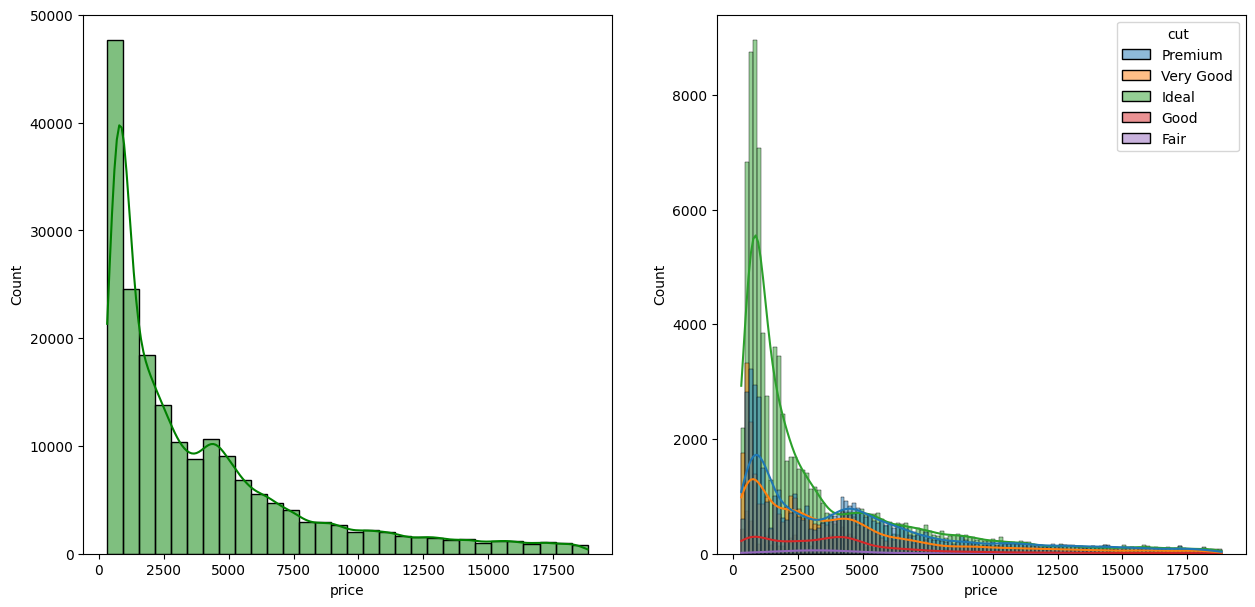

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='price',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='price',kde=True,hue='cut')
plt.show()

insight:
The price of  the gold increases when the gold is premium

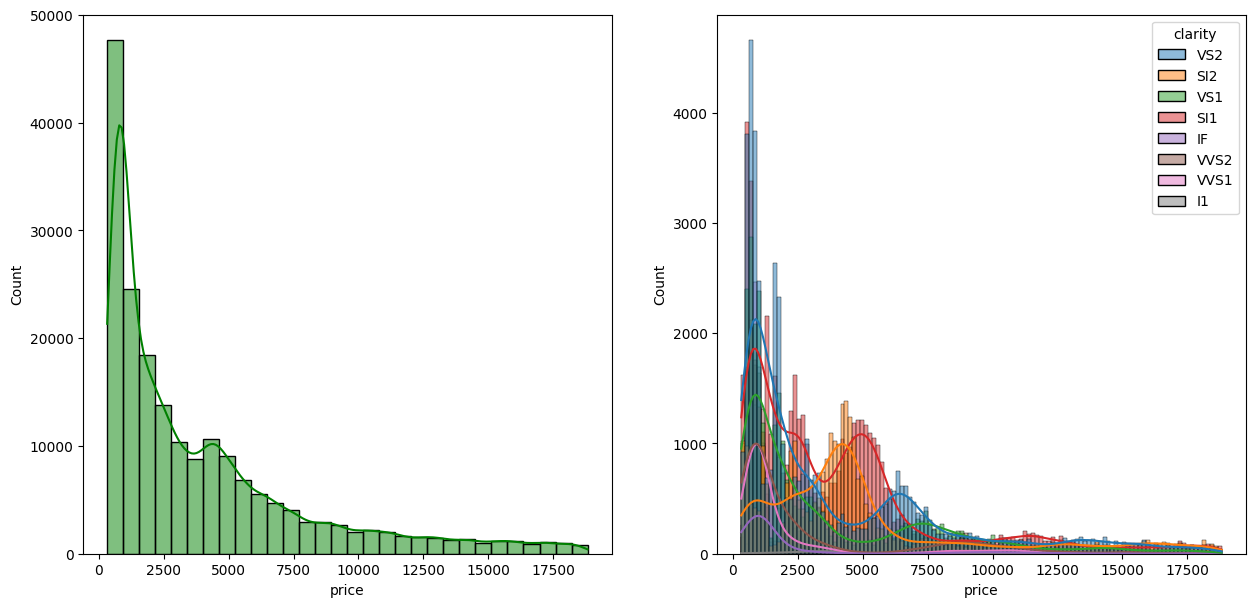

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='price',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='price',kde=True,hue='clarity')
plt.show()

vs2 has the highest quality and
if has the lowest quality.

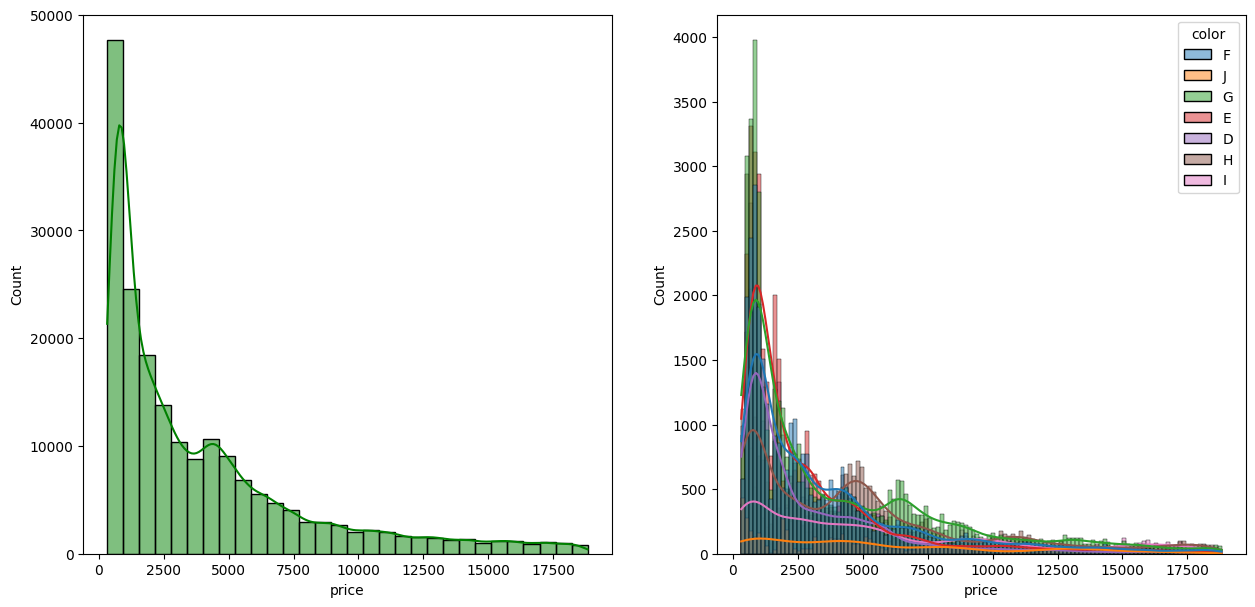

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='price',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='price',kde=True,hue='color')
plt.show()

Green is the most expensive color and j is the least expensive color

Creating piechart using multivariate analysis

In [28]:
cut_quality=['Premium' 'Very Good' 'Ideal' 'Good']
print(len(cut_quality))

1


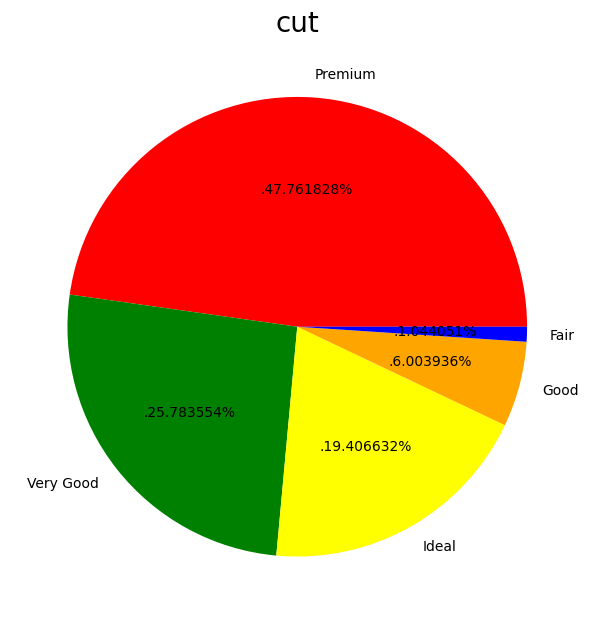

In [29]:
cut_quality=['Premium','Very Good','Ideal','Good','Fair']
plt.rcParams['figure.figsize'] = (30, 12)
plt.subplot(1, 5, 1)
size = df['cut'].value_counts()
labels =list(cut_quality)
color = ['red','green','yellow','orange','blue']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('cut', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()



(-1.25, 1.25, -1.25, 1.25)

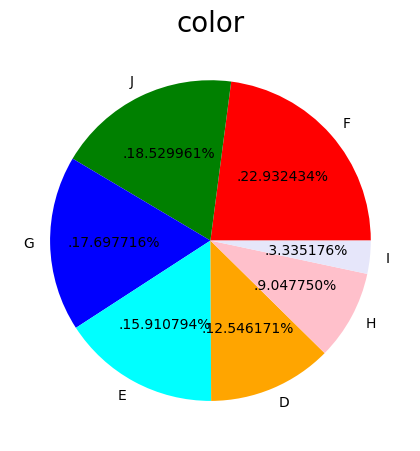

In [30]:
plt.subplot(1, 5, 2)
size = df['color'].value_counts()
labels =  ['F','J','G','E','D','H','I']
color = ['red', 'green', 'blue', 'cyan','orange','pink','lavender']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('color', fontsize = 20)
plt.axis('off')


(-1.25, 1.25, -1.25, 1.25)

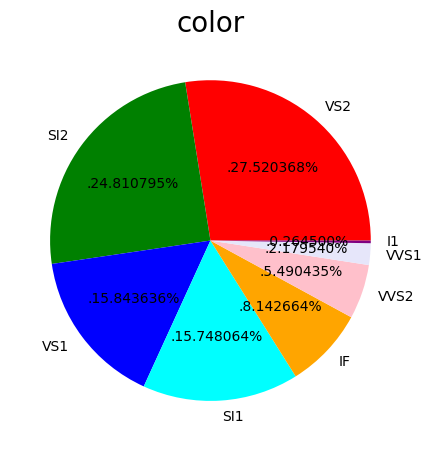

In [33]:
plt.subplot(1, 5, 3)
size = df['clarity'].value_counts()
labels =   ['VS2','SI2','VS1','SI1','IF','VVS2','VVS1','I1']
color = ['red', 'green', 'blue', 'cyan','orange','pink','lavender','purple']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('color', fontsize = 20)
plt.axis('off')

Vs2 is the highest and l1 is the lowest

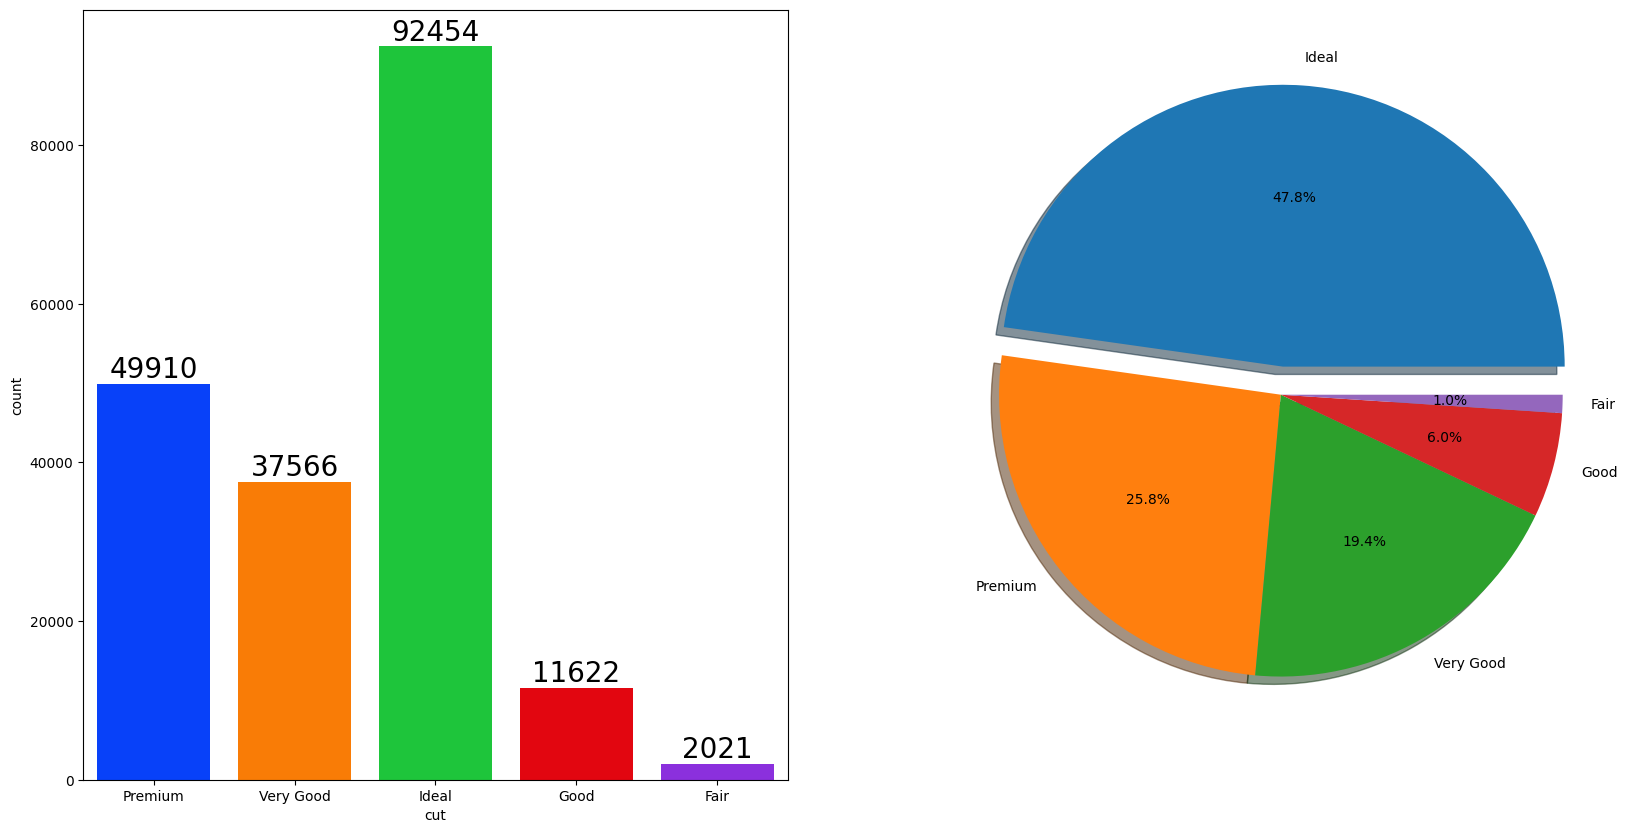

In [35]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['cut'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['cut'].value_counts(),labels=df['cut'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

Now w.r.t clarity

ValueError: 'explode' must be of length 'x'

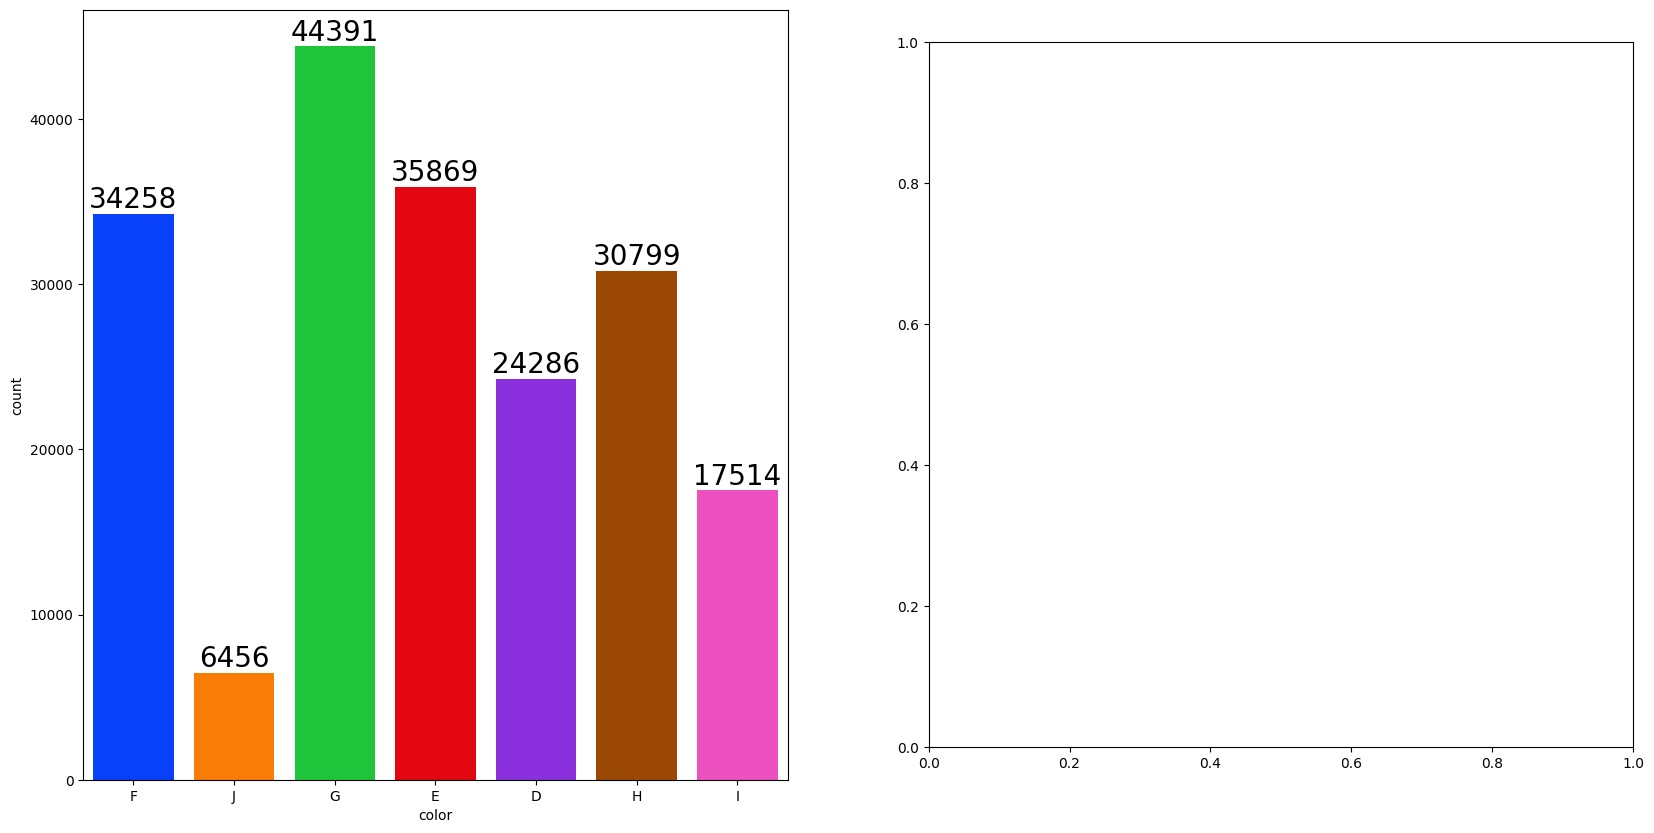

In [36]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['color'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['color'].value_counts(),labels=df['color'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  
